# X and y Data Creation

X_data: shape (n_windows, samples_per_window, n_components) 

y_precise: exact sample-level earthquake labels

y_condensed: binary labels per window (0=no earthquake, 1=earthquake)

In [1]:
import os
import numpy as np
from obspy import read
from mseed2npy import integrate_preprocessing_and_labeling

Read and merge the stream data (merging is needed for most cases!)

In [ ]:
stream = read('/home/ege/rawcovar_data/DEC2020/mseeds/ARMT.mseed')
stream.merge()

3 Trace(s) in Stream:
KO.YLV..HHE | 2020-11-30T23:59:59.080000Z - 2021-01-01T00:00:02.440000Z | 100.0 Hz, 267840337 samples (masked)
KO.YLV..HHN | 2020-11-30T23:59:58.160000Z - 2021-01-01T00:00:02.170000Z | 100.0 Hz, 267840402 samples (masked)
KO.YLV..HHZ | 2020-11-30T23:59:55.580000Z - 2021-01-01T00:00:03.570000Z | 100.0 Hz, 267840800 samples (masked)

In [3]:
X_data, y_precise, y_condensed = integrate_preprocessing_and_labeling(stream, 'station_arrivals.csv',output_dir='processed_data') 
print(f"Processed data shape: {X_data.shape}")
print(f"Windows with earthquakes: {y_condensed.sum()}/{len(y_condensed)}")

Processing 89280 potential windows...
  Found 88714 windows that are good for all traces

Summary:
  Started with 89280 potential windows
  Kept 88714 good windows (99.4%)
  Final shape: (88714, 3000, 3)
  Saved to: processed_data/KO.YLV.20201130_235959.npy

Label summary:
  Created labels for 88714 windows
  Windows with earthquakes: 198

Final results:
  X shape: (88714, 3000, 3)
  y_precise shape: (88714, 3000)
  y_condensed shape: (88714,)
  Everything is aligned and ready.
Processed data shape: (88714, 3000, 3)
Windows with earthquakes: 198/88714


### Plot a sample window

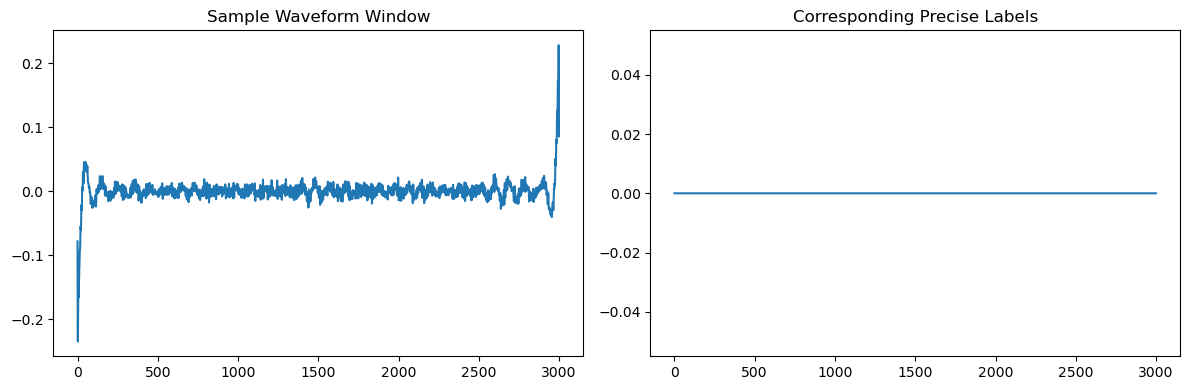

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.title("Sample Waveform Window")
plt.plot(X_data[31, :, 0])  # First window, first channel
plt.subplot(122)
plt.title("Corresponding Precise Labels")
plt.plot(y_precise[0])
plt.tight_layout()
plt.show()

In [5]:
y_condensed.shape, y_precise.shape, X_data.shape

((88714,), (88714, 3000), (88714, 3000, 3))

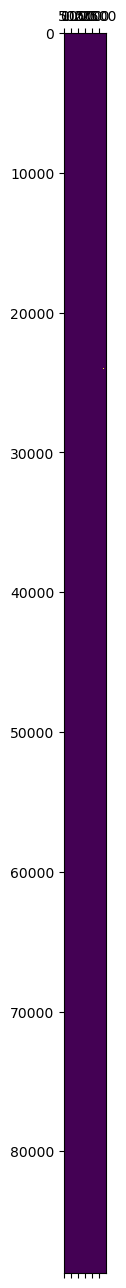

In [6]:
plt.matshow(y_precise)

In [7]:
np.save('y_precise.npy', y_precise)
np.save('y_condensed.npy', y_condensed)